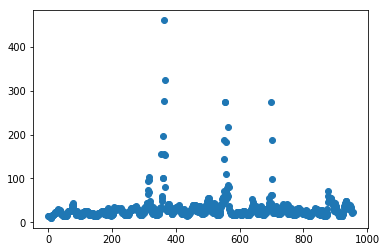

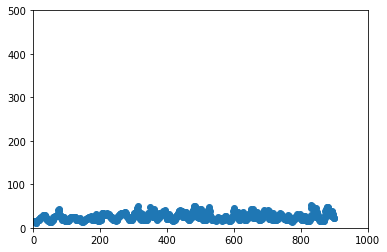

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("datasets/Training_Data.csv")
RRP = list(data['P(t+1)'])

plt.plot(RRP, 'o')
plt.show()

Q1 = np.percentile(RRP, 25)
Q3 = np.percentile(RRP, 75)

safe = [Q1 - 1.5 * (Q3 - Q1), Q3 + 1.5 * (Q3 - Q1)]
position = np.concatenate((np.where(RRP > safe[1]),
                           np.where(RRP < safe[0])), axis=1)
RRP_cleaned = np.delete(RRP, position)

plt.plot(RRP_cleaned, 'o')
plt.xlim(0, 1000)
plt.ylim(0, 500)
plt.show()

In [8]:
import pandas as pd
import numpy as np

# Read in data & convert price to a list
df = pd.read_csv("datasets/Training_Data.csv")
RRP = list(df['P(t+1)'])

# Remove outliers with IQR
Q1 = np.percentile(RRP, 25)
Q3 = np.percentile(RRP, 75)
inRange = [Q1 - 1.5 * (Q3 - Q1), Q3 + 1.5 * (Q3 - Q1)]
position = np.concatenate((np.where(RRP > inRange[1]),
                           np.where(RRP < inRange[0])), axis=1)

# Drop rows with outliers and export
df = df.drop(df.index[position[0]])
df.to_csv("datasets/Training_Cleaned.csv", index=False)

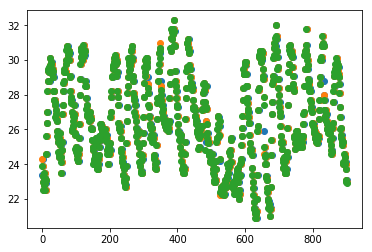